# Code and an Example for the Randomization Test

Import necessary libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
def rand_test(x, y, N, alternative, moi):
    n1, n2 = len(x), len(y)
    if moi == "mean":
        t = np.mean(x) - np.mean(y)
    elif moi == "median":
        t = np.median(x) - np.median(y)
    comb = np.concatenate([x, y])
    c = 0
    for i in range(N):
        np.random.shuffle(comb)
        x_star = comb[0:n1]
        y_star = comb[n1:(n1+n2)]
        if moi == "mean":
            t_star = np.mean(x_star) - np.mean(y_star)
        elif moi == "median":
            t_star = np.median(x_star) - np.median(y_star)
        if alternative == "two.sided":
            c += t_star >= np.abs(t) or t_star <= -np.abs(t)
        elif alternative == "greater":
            c += t_star >= t
        elif alternative == "less":
            c += t_star <= t
    pv = c / N
    return t, pv

Change working directory

In [3]:
os.chdir("/Users/nstevens/Dropbox/Teaching/MSDS_629/2023/Lectures/Lecture3")

Read in the data

In [4]:
pokemon = pd.read_csv('pokemongo.csv')
pokemon.head(10)

,control,freecoins,discount
0,12,23,22
1,7,9,3
2,12,11,20
3,4,1,3
4,8,19,3
5,6,16,36
6,1,10,4
7,20,9,4
8,7,10,6
9,18,3,20


Visualize the data

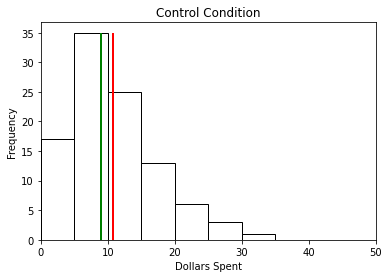

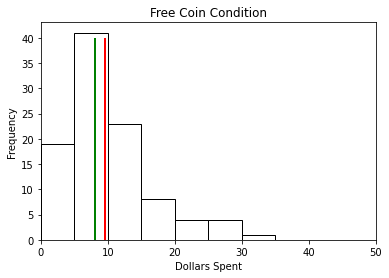

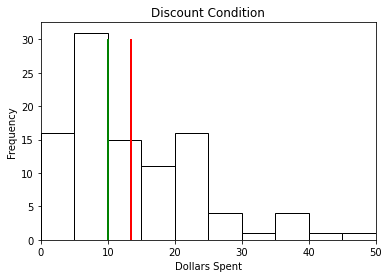

In [5]:
plt.figure()
plt.hist(pokemon["control"], color = "white", edgecolor = "black", bins = np.linspace(start=0, stop=50, num=11))
plt.xlim(0,50)
plt.xlabel("Dollars Spent")
plt.ylabel("Frequency")
plt.title("Control Condition")
plt.vlines(x = np.mean(pokemon["control"]), ymin = 0, ymax = 35, color = "red", linewidth = 2)
plt.vlines(x = np.median(pokemon["control"]), ymin = 0, ymax = 35, color = "green", linewidth = 2)
plt.figure()
plt.hist(pokemon["freecoins"], color = "white", edgecolor = "black", bins = np.linspace(start=0, stop=50, num=11))
plt.xlim(0,50)
plt.xlabel("Dollars Spent")
plt.ylabel("Frequency")
plt.title("Free Coin Condition")
plt.vlines(x = np.mean(pokemon["freecoins"]), ymin = 0, ymax = 40, color = "red", linewidth = 2)
plt.vlines(x = np.median(pokemon["freecoins"]), ymin = 0, ymax = 40, color = "green", linewidth = 2)
plt.figure()
plt.hist(pokemon["discount"], color = "white", edgecolor = "black", bins = np.linspace(start=0, stop=50, num=11))
plt.xlim(0,50)
plt.xlabel("Dollars Spent")
plt.ylabel("Frequency")
plt.title("Discount Condition")
plt.vlines(x = np.mean(pokemon["discount"]), ymin = 0, ymax = 30, color = "red", linewidth = 2)
plt.vlines(x = np.median(pokemon["discount"]), ymin = 0, ymax = 30, color = "green", linewidth = 2)

Let us now compare these three conditions in a pairwise fashion, assuming the MOI is a mean. We begin by comparing the control and free coin conditions.

$$H_0:\mu_1=\mu_2 \text{ vs. }H_A:\mu_1\neq\mu_2$$

In [11]:
t, pv = rand_test(x = pokemon["control"], y = pokemon["freecoins"], 
                  N = 10000, alternative = "two.sided", moi = "mean")
print("t =", t)
print("p-value =", pv)

t = 1.2100000000000009
p-value = 0.1751


With a p-value this large we do not have sufficient evidence to reject the null and so we conclude that the average dollars spent is similar in control and free coin condition. Next let us compare the control and discount conditions.

$$H_0:\mu_1=\mu_3 \text{ vs. }H_A:\mu_1\neq\mu_3$$

In [14]:
t, pv = rand_test(x = pokemon["control"], y = pokemon["discount"], 
                  N = 10000, alternative = "two.sided", moi = "mean")
print("t =", t)
print("p-value =", pv)

t = -2.67
p-value = 0.0259


This small p-value provides evidence against the null and so reject it and conclude that the average dollars spent is significantly different between the two conditions. We follow-up with a one-sided test to determine whether the discount condition is associated with a significantly _larger_ average dollars spent. 

$$H_0:\mu_1\geq\mu_3 \text{ vs. }H_A:\mu_1<\mu_3$$

In [18]:
t, pv = rand_test(x = pokemon["control"], y = pokemon["discount"], 
                  N = 10000, alternative = "less", moi = "mean")
print("t =", t)
print("p-value =", pv)

t = -2.67
p-value = 0.0154


This small p-value suggests that this is indeed the case. Finally we compare the free coin and discount conditions. 

$$H_0:\mu_2=\mu_3 \text{ vs. }H_A:\mu_2\neq\mu_3$$

In [24]:
t, pv = rand_test(x = pokemon["freecoins"], y = pokemon["discount"], 
                  N = 10000, alternative = "two.sided", moi = "mean")
print("t =", t)
print("p-value =", pv)

t = -3.880000000000001
p-value = 0.0012


This small p-value provides evidence against the null and so reject it and conclude that the average dollars spent is significantly different between the two conditions. We follow-up with a one-sided test to determine whether the discount condition is associated with a significantly _larger_ average dollars spent. 

$$H_0:\mu_2\geq\mu_3 \text{ vs. }H_A:\mu_2<\mu_3$$

In [26]:
t, pv = rand_test(x = pokemon["freecoins"], y = pokemon["discount"], 
                  N = 10000, alternative = "less", moi = "mean")
print("t =", t)
print("p-value =", pv)

t = -3.880000000000001
p-value = 0.0005


This small p-value suggests that this is indeed the case. 

Next let us make similar comparisons but on the basis of medians.

$$H_0:Q_1(0.5)=Q_2(0.5) \text{ vs. }H_A:Q_1(0.5)\neq Q_2(0.5)$$

In [27]:
t, pv = rand_test(x = pokemon["control"], y = pokemon["freecoins"], 
                  N = 10000, alternative = "two.sided", moi = "median")
print("t =", t)
print("p-value =", pv)

t = 1.0
p-value = 0.5781


This large p-value suggests the control and free coin conditions do not differ significantly with respect to median dollars spent. Next let us compare the discount and control conditions.

$$H_0:Q_1(0.5)=Q_3(0.5) \text{ vs. }H_A:Q_1(0.5)\neq Q_3(0.5)$$

In [28]:
t, pv = rand_test(x = pokemon["control"], y = pokemon["discount"], 
                  N = 10000, alternative = "two.sided", moi = "median")
print("t =", t)
print("p-value =", pv)

t = -1.0
p-value = 0.7828


This large p-value suggests the control and discount conditions do not differ significantly with respect to median dollars spent. Next let us compare the discount and free coin conditions.

$$H_0:Q_2(0.5)=Q_3(0.5) \text{ vs. }H_A:Q_2(0.5)\neq Q_3(0.5)$$

In [29]:
t, pv = rand_test(x = pokemon["freecoins"], y = pokemon["discount"], 
                  N = 10000, alternative = "two.sided", moi = "median")
print("t =", t)
print("p-value =", pv)

t = -2.0
p-value = 0.2475


This large p-value suggests the free coin and discount conditions do not differ significantly with respect to median dollars spent.

In [8]:
stats.chi2.ppf(0.95, df = 3)

7.814727903251179